In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [66]:
Data_File = pd.read_csv('churn_data.csv')

In [67]:
Data_File_Backup = Data_File.copy()

In [68]:
Data_File.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [69]:
Data_File.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     27000 non-null  int64  
 1   churn                    27000 non-null  int64  
 2   age                      26996 non-null  float64
 3   housing                  27000 non-null  object 
 4   credit_score             18969 non-null  float64
 5   deposits                 27000 non-null  int64  
 6   withdrawal               27000 non-null  int64  
 7   purchases_partners       27000 non-null  int64  
 8   purchases                27000 non-null  int64  
 9   cc_taken                 27000 non-null  int64  
 10  cc_recommended           27000 non-null  int64  
 11  cc_disliked              27000 non-null  int64  
 12  cc_liked                 27000 non-null  int64  
 13  cc_application_begin     27000 non-null  int64  
 14  app_downloaded        

In [70]:
# Delete User Column
del Data_File['user']

In [71]:
# Check for Missing Values
pd.options.display.max_rows = None

Data_File.isnull().sum()

churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: int64

In [72]:
# Replace Missing Values with 0s

Data_File['age'].fillna(0, inplace=True)
Data_File['credit_score'].fillna(0, inplace=True)
Data_File['rewards_earned'].fillna(0, inplace=True)

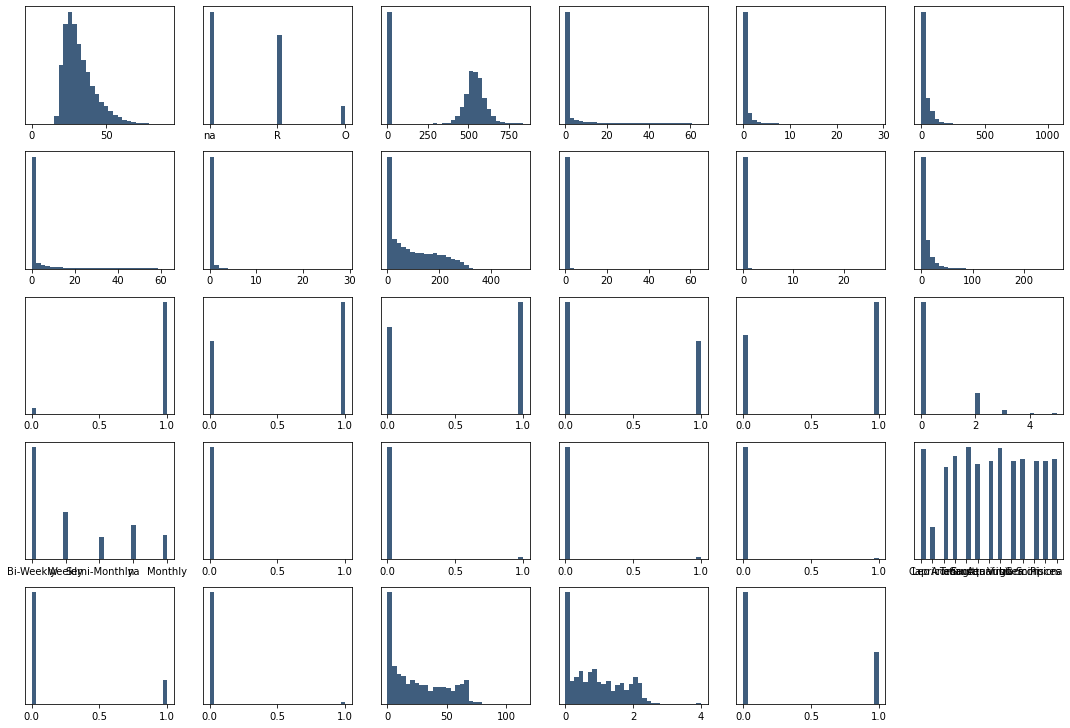

In [73]:
#Histogram

fig = plt.figure(figsize=(15, 12))

# loop over all vars (total: 34)
for i in range(1, Data_File.shape[1]):
    plt.subplot(6, 6, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    # f.axes.set_ylim([0, train.shape[0]])

    vals = np.size(Data_File.iloc[:, i].unique())
    if vals < 10:
        bins = vals
    else:
        vals = 10

    plt.hist(Data_File.iloc[:, i], bins=30, color='#3F5D7D')

plt.tight_layout()


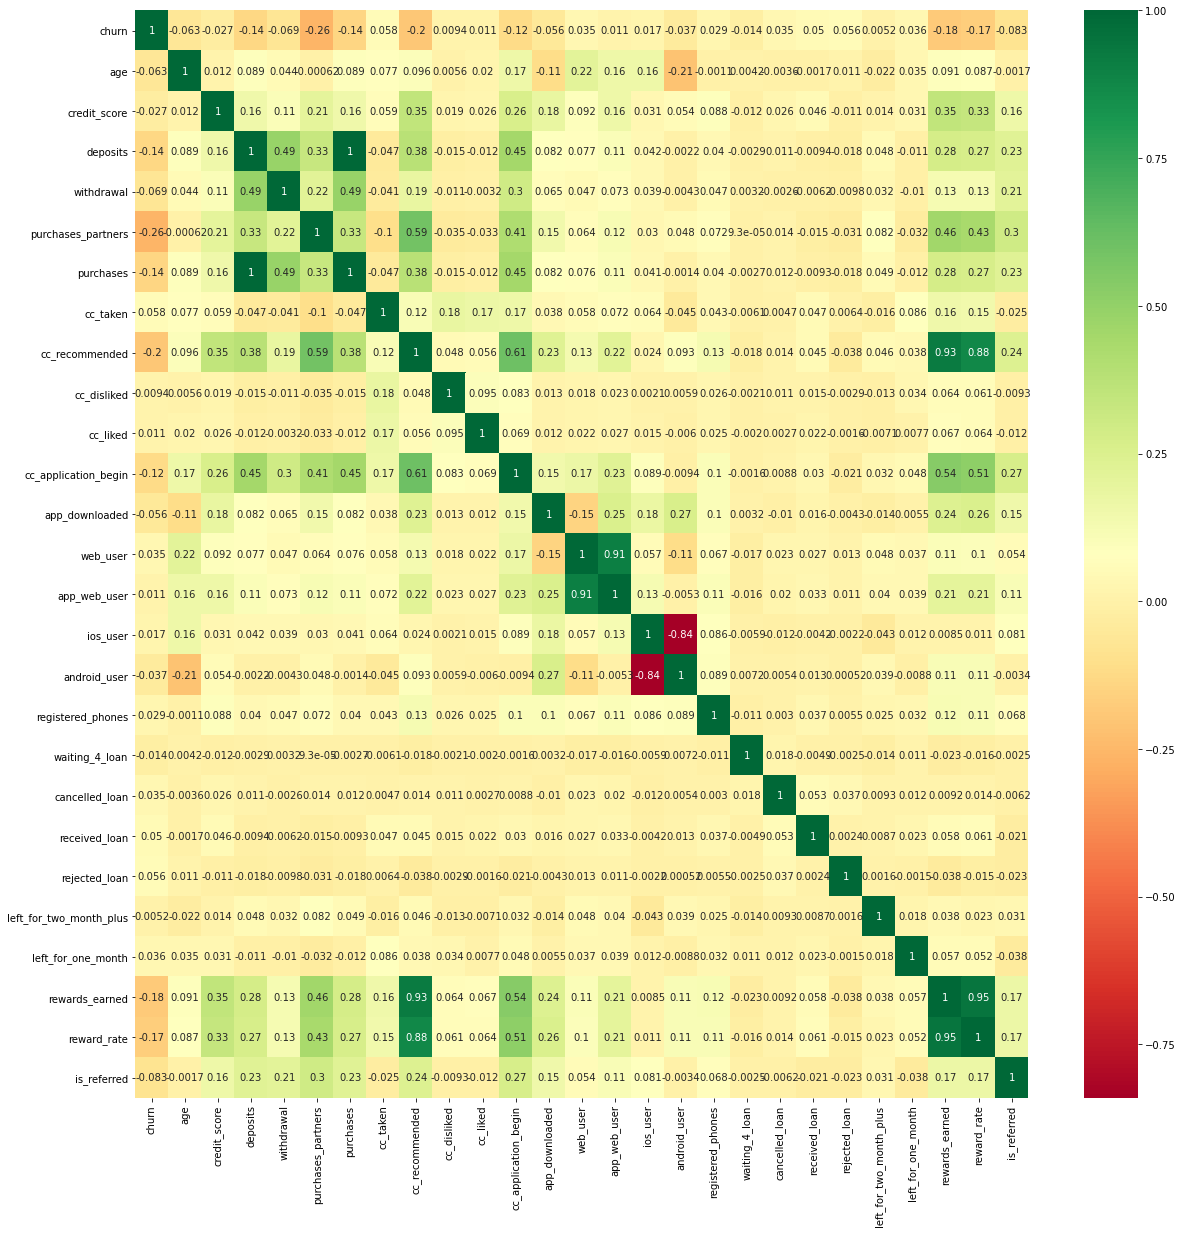

In [74]:
#Create Correlation Matrix

## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = Data_File.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(Data_File[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [75]:
#del Data_File['cc_recommended']
#del Data_File['rewards_earned']
#del Data_File['cc_disliked']
#del Data_File['cc_liked']
#del Data_File['app_downloaded']
#del Data_File['android_user']
#del Data_File['waiting_4_loan']
#del Data_File['zodiac_sign']
#del Data_File['cc_application_begin']
#del Data_File['is_referred']

In [76]:
Data_File.to_csv('Churn_Data_T1.csv', index=False)